In [18]:
import folium 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
import sys
sys.path.append('../scripts/')

from data_extraction import DataExtraction
dextract = DataExtraction()


In [25]:
df = dextract.load_data('../data/features.csv')
df.head()

,id,order_id,driver_id,driver_action,lat,lng,order_origin,trip_origin,trip_destination,trip_Start_time,trip_end_time,driver_order_dst,trip_dstance,trip_time,trip_speed,month,day,week_day,hour
0,1,392001,243828,accepted,6.602207,3.270465,"(6.6022066, 3.2704649)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,693.62,21048.29,217.0,96.996728,7.0,1.0,3.0,9.0
1,2,392001,243588,rejected,6.592097,3.287445,"(6.5920972, 3.2874447)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,1554.09,21048.29,217.0,96.996728,7.0,1.0,3.0,9.0
2,3,392001,243830,rejected,6.596133,3.281784,"(6.5961334, 3.2817841)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,788.35,21048.29,217.0,96.996728,7.0,1.0,3.0,9.0
3,4,392001,243539,rejected,6.596142,3.280526,"(6.5961416, 3.2805263)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,694.07,21048.29,217.0,96.996728,7.0,1.0,3.0,9.0
4,5,392001,171653,rejected,6.609232,3.288800,"(6.6092317, 3.2887999)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,1623.33,21048.29,217.0,96.996728,7.0,1.0,3.0,9.0


### plot latitude vs longitude of dirver location 

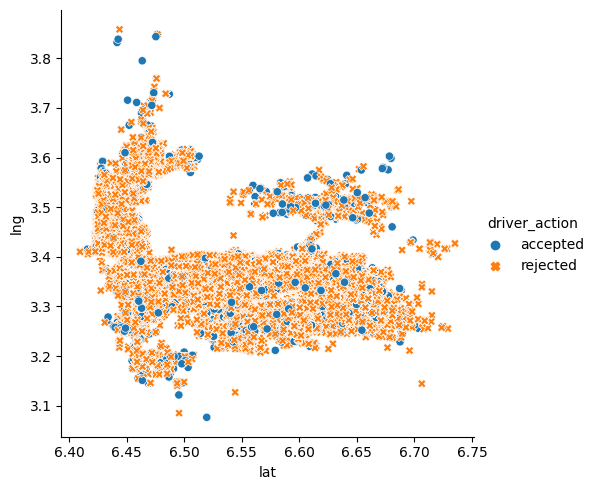

In [14]:
sns.relplot(
    data=df,
    x="lat", y="lng", hue="driver_action", style="driver_action"
)

### plot driver distance vs acceptance rate

In [26]:
df_acc = df.groupby(['order_id','driver_action']).agg(
    {'driver_order_dst':['mean']}).reset_index()
df_acc['dod'] = df_acc['driver_order_dst']['mean']

df_new = pd.DataFrame()
df_new['order_id'] = df_acc['order_id']
df_new['driver_action'] = df_acc['driver_action']
df_new['dod'] = df_acc['dod']
# df_acc.drop(columns='driver_order_dst')
df_new.columns

Index(['order_id', 'driver_action', 'dod'], dtype='object')

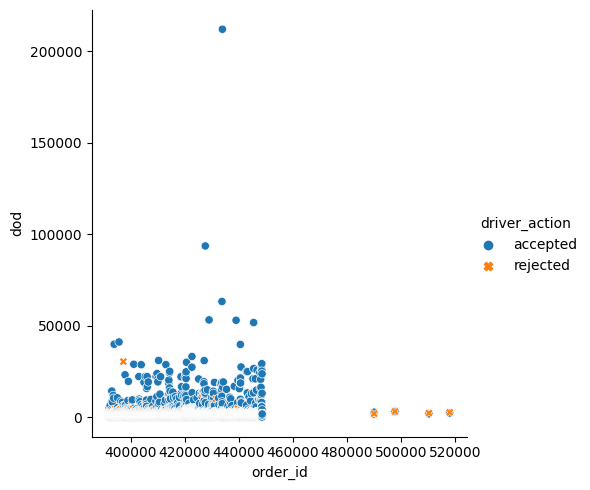

In [31]:
sns.relplot(
    data=df_new[df_new['dod']<500000],
    x="order_id", y="dod", hue="driver_action", style="driver_action"
)

This graph depict that the driver rejecting a request are closer than the accepting drivers.

In [16]:
accepted_df = df[df['driver_action']=='accepted']
rejected_df = df[df['driver_action']=='rejected']

print('accepted shape {}'.format(accepted_df.shape))
print('rejected shape {}'.format(rejected_df.shape))

accepted shape (25902, 19)
rejected shape (1531837, 19)


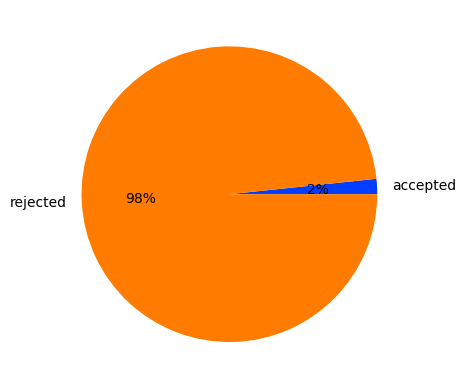

In [20]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie([25902,1531837], labels=['accepted','rejected'], colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

2% of the driver accepted the request. Most of the driver are rejecting. Why?

In [32]:
handed_over = accepted_df[accepted_df['trip_speed'] < 10]
print('Handed over deliveries count {}'.format(handed_over.shape)) 

handed over deliveries count (22816, 19)
